# Generalized model for obtaining simulations of prices and volatilities with real data taken from an asset

In [1]:
from parameters import obtener_datos_historicos
from functions import generate_heston_paths, graficar_simulacion_precios_y_volatilidades, graficar_simulacion_precio_y_volatilidad2, calcular_precios_de_opciones_para_K, crear_dataframe_de_precios, crear_dataframe_de_precios2, calcular_precios_positivos_y_negativos, graficar_tail_density, calcular_y_graficar_smileBSvolatility, calcular_y_graficar_volatilidades_implícitas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Llama a la función con el ticker y las fechas deseadas
ticker = "AMZN"
start_date = "2018-10-11"
end_date = "2023-10-10"
historical_data, v_0, theta, kappa, sigmaV, rhoSV = obtener_datos_historicos(ticker, start_date, end_date)

In [3]:
historical_data

,date,high,low,open,close,volume,adjclose
formatted_date,,,,,,,
2018-10-11,1539264600,87.769997,84.254997,86.199997,85.968002,278718000,85.968002
2018-10-12,1539351000,90.447502,87.126503,90.400002,89.430496,188892000,89.430496
2018-10-15,1539610200,89.752502,86.711502,89.750000,88.047501,128744000,88.047501
2018-10-16,1539696600,91.194000,88.077499,89.175003,90.998001,117198000,90.998001
2018-10-17,1539783000,92.250000,90.349998,92.139503,91.586502,105904000,91.586502
...,...,...,...,...,...,...,...
2023-10-03,1696339800,128.520004,124.250000,128.059998,124.720001,51565000,124.720001
2023-10-04,1696426200,127.360001,125.680000,126.059998,127.000000,44203900,127.000000
2023-10-05,1696512600,126.730003,124.330002,126.709999,125.959999,39660600,125.959999


In [4]:
v_0, theta, kappa, sigmaV, rhoSV

(4.947015289406597,
 1.7048487807574157,
 -0.017755133461977605,
 2.2861716579839215,
 0.17870520625329395)

In [5]:
kappa = kappa
theta = theta
v_0 =  v_0
xi = sigmaV
r = 0.0538 #tomada de https://www.bloomberg.com/markets/rates-bonds/government-bonds/us a un año
S = historical_data["adjclose"].iloc[-1]
Npaths = 5000
steps = 252
T = 1
rho = rhoSV
prices, volatilities = generate_heston_paths(S, T, r, kappa, theta, v_0, rho, xi, steps, Npaths, return_vol=True)

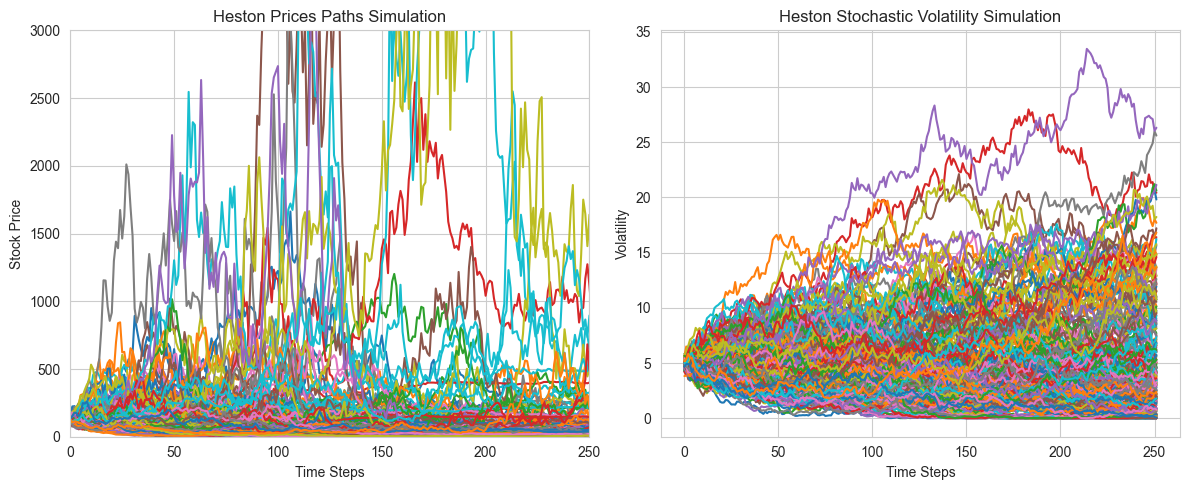

In [6]:
graficar_simulacion_precios_y_volatilidades(prices,volatilities, steps)

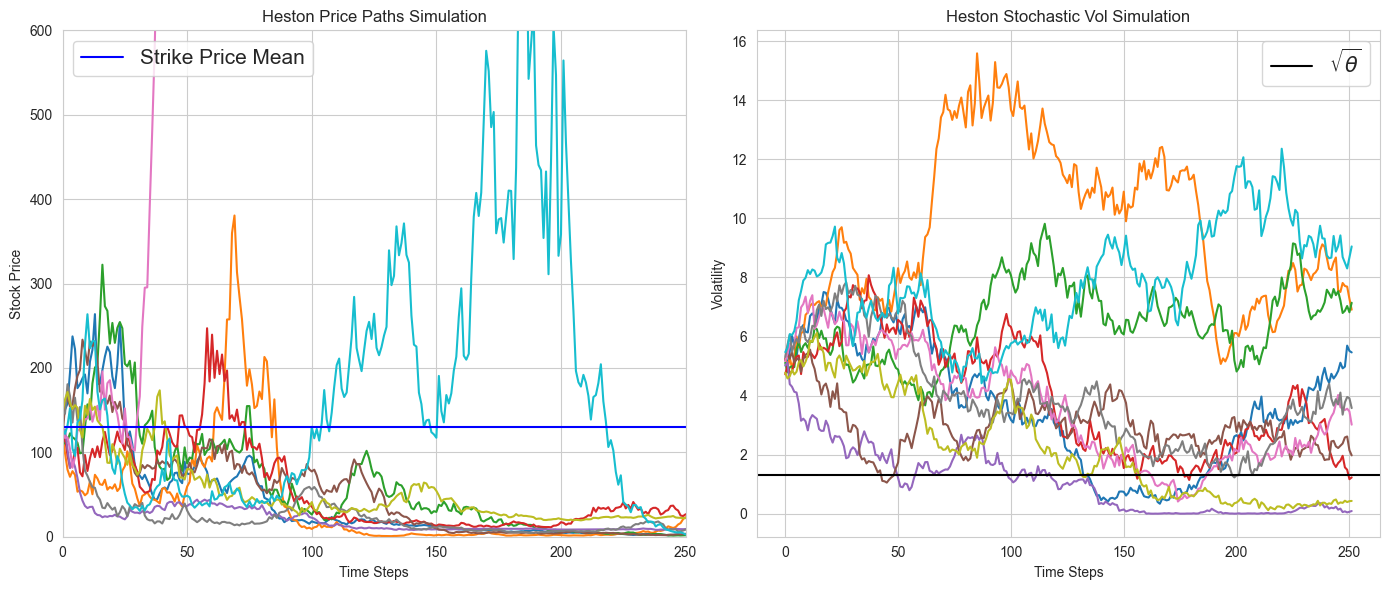

In [7]:
# Llama la función con los datos correspondientes
Npaths2 = 10
steps2 = 252
y = 130
pricesej, volatilitiesej = generate_heston_paths(S, T, r, kappa, theta, v_0, rho, xi, steps, Npaths, return_vol=True)
graficar_simulacion_precio_y_volatilidad2(pricesej, volatilitiesej, steps2, y, theta)

In [8]:
k1 = np.linspace(S * 0.3, S * 1.7, num=20)
# Llama la función para crear el DataFrame
df2 = crear_dataframe_de_precios(S, T, r, volatilities, Npaths, k1)
df2

,K_value,Call_Prices,Put_Prices
0,38.477998,"[92.67513751299964, 118.68044022314734, 128.23...","[0.8777258261808636, 26.883028536328556, 36.43..."
1,47.928735,"[84.79859547890456, 117.35883429597031, 128.23...","[1.9569058882303283, 34.51714470529609, 45.389..."
2,57.379471,"[77.47653901778078, 116.17427642356543, 128.22...","[3.5905715232511284, 42.28830892903579, 54.342..."
3,66.830208,"[70.73412524211173, 115.09619109739688, 128.22...","[5.803879843726641, 50.16594569901181, 63.2958..."
4,76.280944,"[64.5660906027847, 114.10387488853654, 128.223...","[8.59156730054417, 58.12935158629601, 72.24919..."
5,85.731681,"[58.94845609821803, 113.18252417801298, 128.22...","[11.929654892122063, 66.16372297191703, 81.202..."
6,95.182417,"[53.84685868266286, 112.32111473079628, 128.21...","[15.783779572711463, 74.25803562084488, 90.156..."
7,104.633153,"[49.22208472601857, 111.51117342093133, 128.21...","[20.11472771221176, 82.40381640712451, 99.1100..."
8,114.083890,"[45.03357739880099, 110.74602114612621, 128.21...","[24.881942481138715, 90.59438622846395, 108.06..."
9,123.534626,"[41.24156310888326, 110.02028275173143, 128.21...","[30.045650287365596, 98.82436993021373, 117.01..."


In [9]:
df3 = crear_dataframe_de_precios2(S, T, r, v_0, k1)
df3

,K_value,Call_Prices,Put_Prices
0,38.477998,[127.36849262984303],[35.57108094302426]
1,47.928735,[127.2567436808005],[44.41505409012627]
2,57.379471,[127.1561094509279],[53.270141956398234]
3,66.830208,[127.06398997516553],[62.13374457678045]
4,76.280944,[126.97866323007172],[71.0041399278312]
5,85.731681,[126.89891836203644],[79.8801171559405]
6,95.182417,[126.82386536031848],[88.76078625036709]
7,104.633153,[126.75282726026511],[97.6454702464583]
8,114.083890,[126.68527491089995],[106.53363999323768]
9,123.534626,[126.62078539282203],[115.42487257130436]


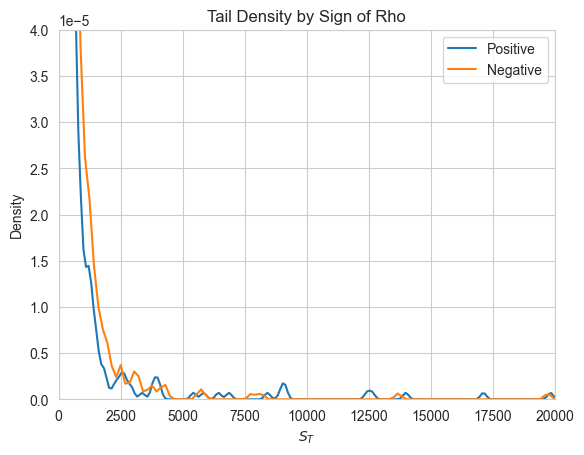

In [10]:
prices_pos, prices_neg = calcular_precios_positivos_y_negativos(S, T, r, kappa, theta, v_0, rhoSV, sigmaV, steps, Npaths)
graficar_tail_density(prices_pos, prices_neg)

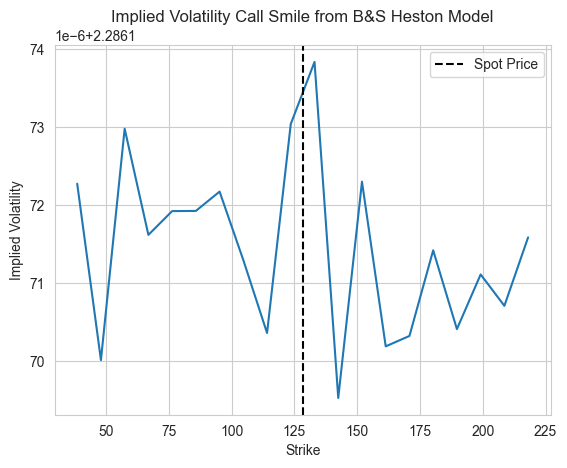

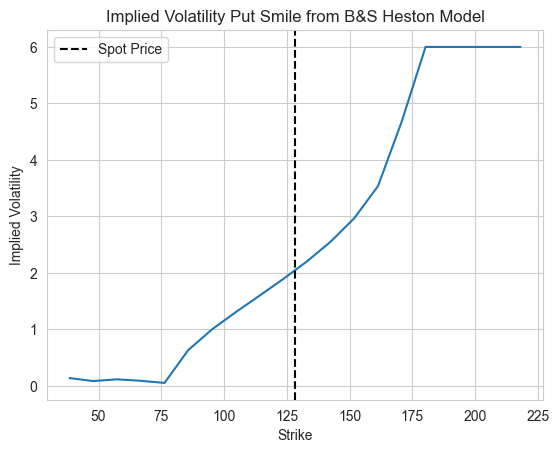

In [11]:
calcular_y_graficar_smileBSvolatility(S, k1, T, r, xi)

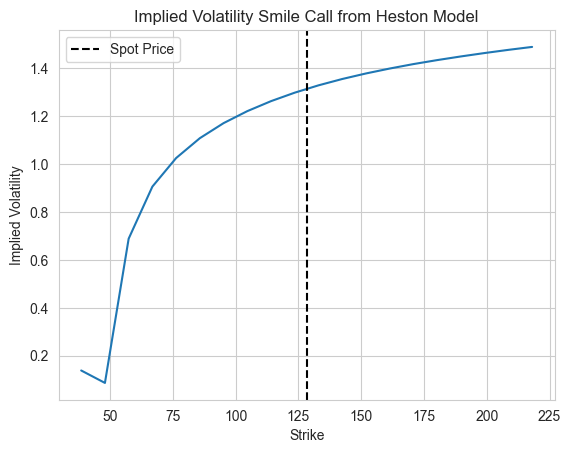

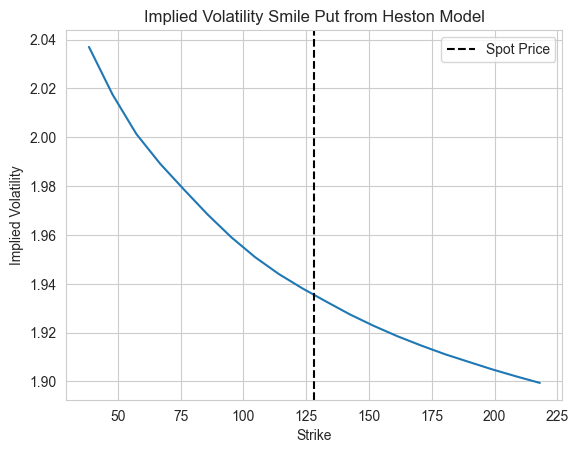

In [12]:
calcular_y_graficar_volatilidades_implícitas(S, k1, T, r, prices_pos, prices_neg, rhoSV, xi, steps, Npaths)